#**HABERMAN ANALYSIS**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('haberman.csv')

In [3]:
df.columns=['Age','Year','Nodes','Survival']

In [4]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


#Agenda:Given a patient with some age,year of operation and number of lymph nodes detected, we have to predict or conclude the chances  whether the patient will live less than 5 years or more than 5 years

In [5]:
df.shape

(305, 4)

In [6]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [10]:
df=df.replace([1,2],[0,1])

In [11]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [12]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


#MIN(age)=30, MAX(age)=83, Year=[1958,1969], Nodes=[0,52], Survival=[0,1]
# Nodes have higher count density between 0 and 4(75% percentile)

# ***UNIVARIATE ANALYSIS***

In [13]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [14]:
df.Survival.value_counts(1)

Survival
0    0.734426
1    0.265574
Name: proportion, dtype: float64

# There are oly 27% people who will be living less than 5 years which means the dataset is imbalanced

<Axes: xlabel='Survival', ylabel='count'>

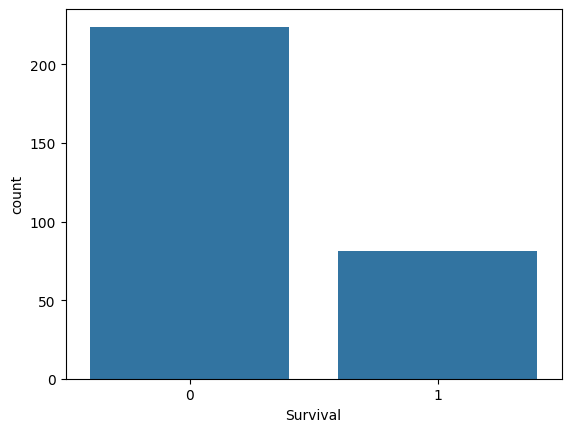

In [15]:
sns.countplot(x='Survival',data=df)

***2.AGE***

In [16]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

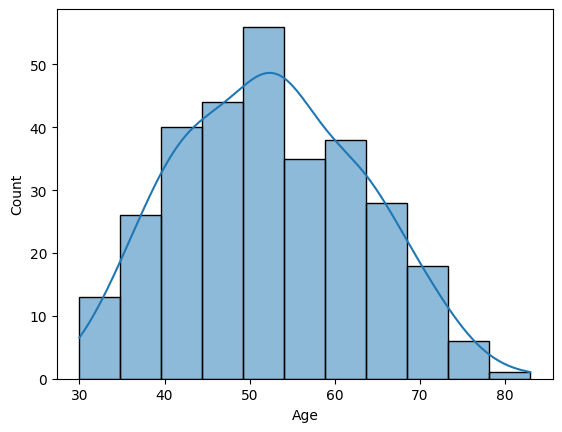

In [17]:
print(df.Age.skew())
sns.histplot(x='Age',data=df,binwidth=5,kde=True)

# The Maximum people who were operated were in the age group of 50-55

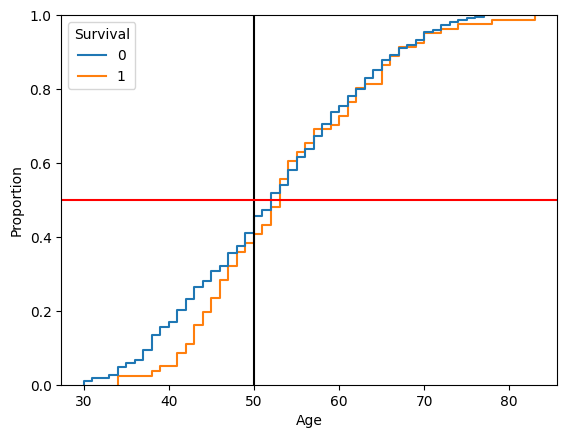

In [18]:
sns.ecdfplot(x='Age',data=df,hue='Survival')
plt.axvline(50,c='black')
plt.axhline(0.5,c='red')

#80% of people were 65 years or below
#50% of people were 52 years or below

***3.Operation Year***

<Axes: xlabel='Year'>

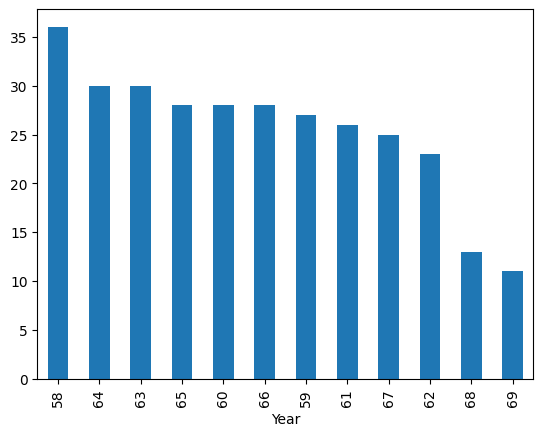

In [19]:
df.Year.value_counts().plot(kind='bar')

***4.Lymph Nodes***

In [20]:
df.Nodes.describe()

count    305.000000
mean       3.839344
std        7.283978
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: xlabel='Nodes'>

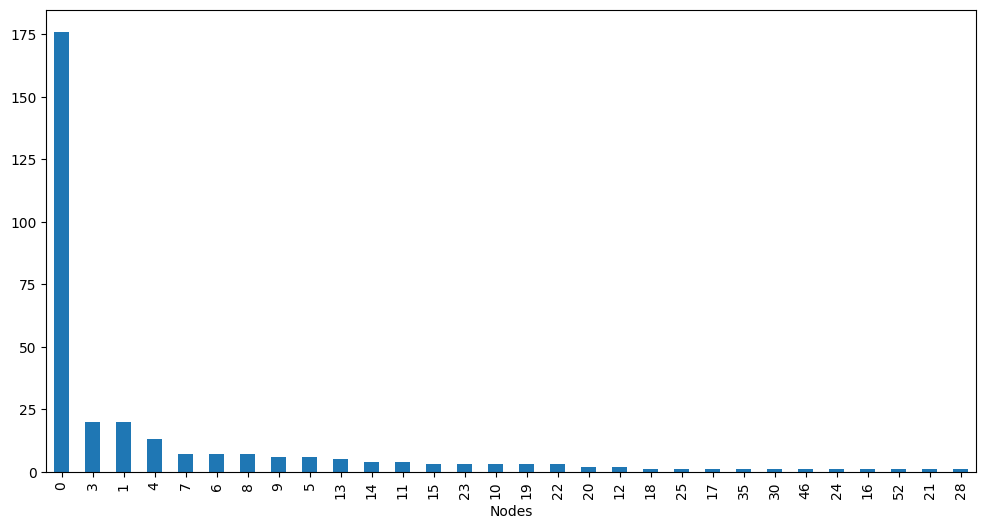

In [21]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar')

2.940405369162834


<Axes: xlabel='Nodes', ylabel='Count'>

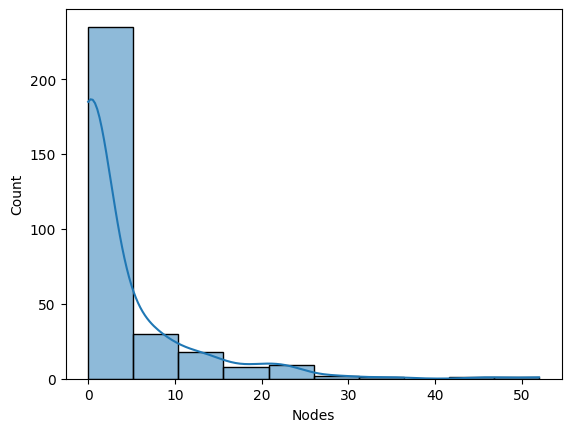

In [22]:
print(df.Nodes.skew())
sns.histplot(x='Nodes',data=df,binwidth=5,kde=True)

Maximum Density Count for nodes is between 0-10

# **BIVARIATE ANALYSIS**

<Axes: xlabel='Survival', ylabel='Age'>

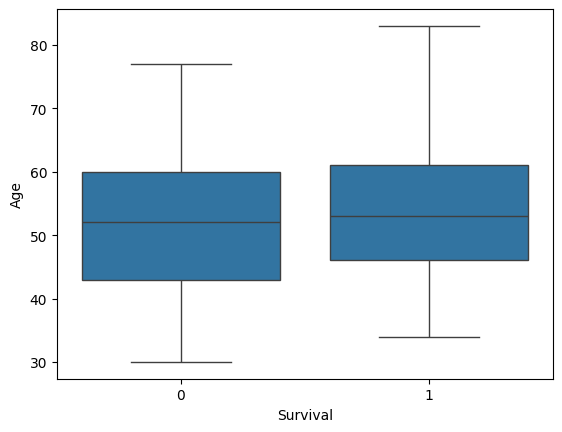

In [23]:
sns.boxplot(x='Survival',y='Age',data=df)

People with age greater than 75 will live lesser than 5 years.

People with age lesser than 35 will live greater than 5 years

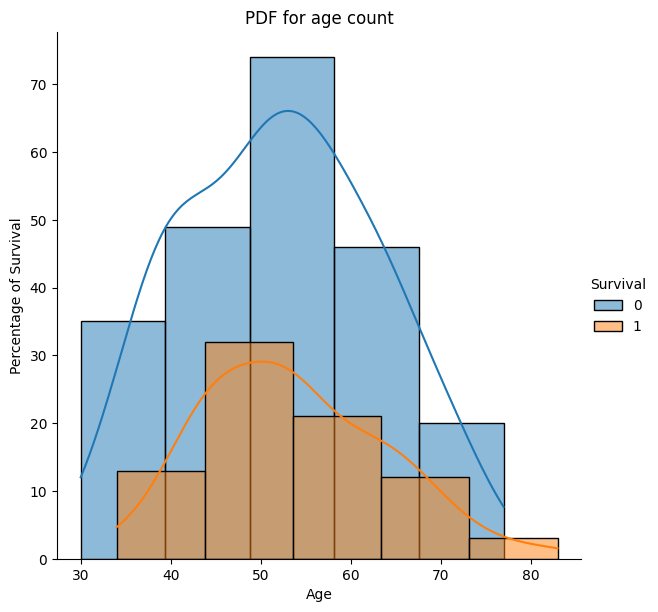

In [24]:
sns.FacetGrid(df,hue='Survival',height=6).map(sns.histplot,'Age',bins=5,kde=True).add_legend()
plt.xlabel('Age')
plt.ylabel('Percentage of Survival')
plt.title('PDF for age count',size=12)
plt.show()

In [25]:
df.groupby('Age')['Survival'].sum()

Age
30    0
31    0
33    0
34    2
35    0
36    0
37    0
38    1
39    1
40    0
41    3
42    2
43    4
44    3
45    3
46    4
47    3
48    3
49    2
50    2
51    2
52    4
53    6
54    4
55    2
56    2
57    3
58    0
59    1
60    2
61    3
62    3
63    1
64    0
65    4
66    2
67    2
68    0
69    1
70    2
71    0
72    1
73    0
74    1
75    0
76    0
77    0
78    1
83    1
Name: Survival, dtype: int64

Maximum % of people living lesser than 5 years are between 45 to 55.

In [26]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

In [27]:
df.Age.value_counts().sort_values(ascending=False)

Age
52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

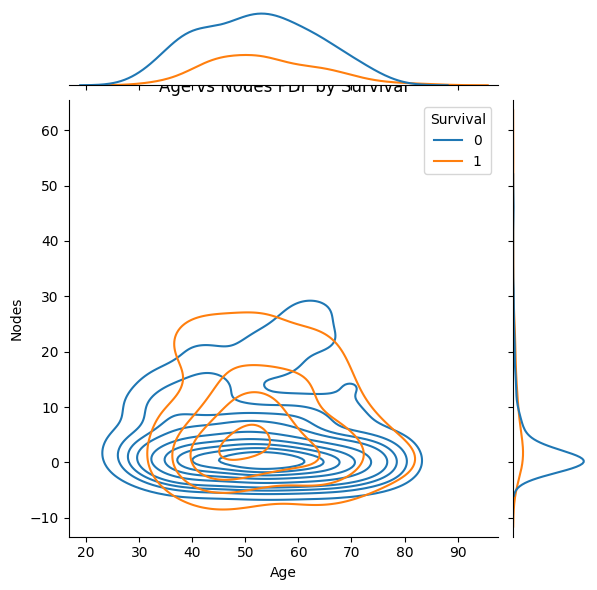

In [28]:
plt.figure()
sns.jointplot(x='Age',y='Nodes',data=df,hue='Survival',kind='kde')
plt.title('Age vs Nodes PDF by Survival')
plt.show()

<Axes: xlabel='Survival', ylabel='Nodes'>

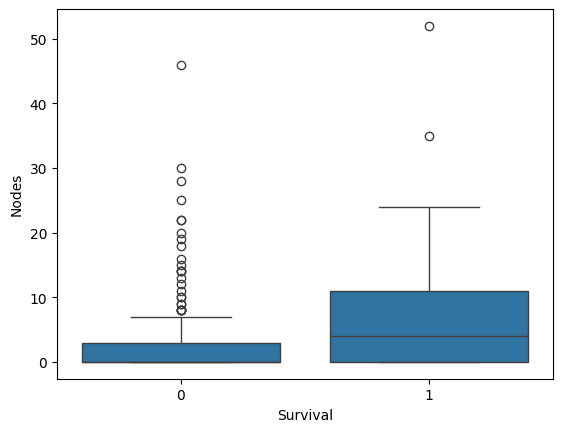

In [29]:
sns.boxplot(x='Survival',y='Nodes',data=df)

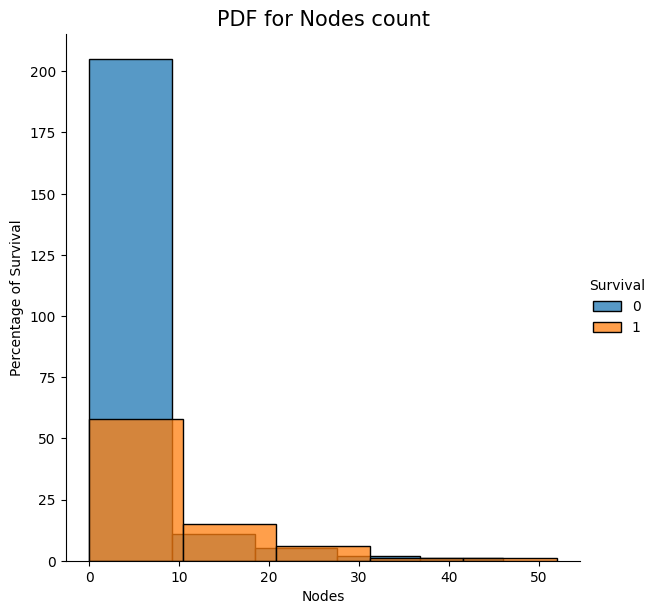

In [30]:
sns.FacetGrid(df,hue='Survival',height=6).map(sns.histplot,'Nodes',bins=5).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Nodes count',size=15)
plt.show()

In [31]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
15     2
19     2
8      2
7      2
24     1
20     1
22     1
21     1
35     1
52     1
17     1
14     1
12     1
10     1
18     0
25     0
28     0
30     0
46     0
16     0
Name: Survival, dtype: int64

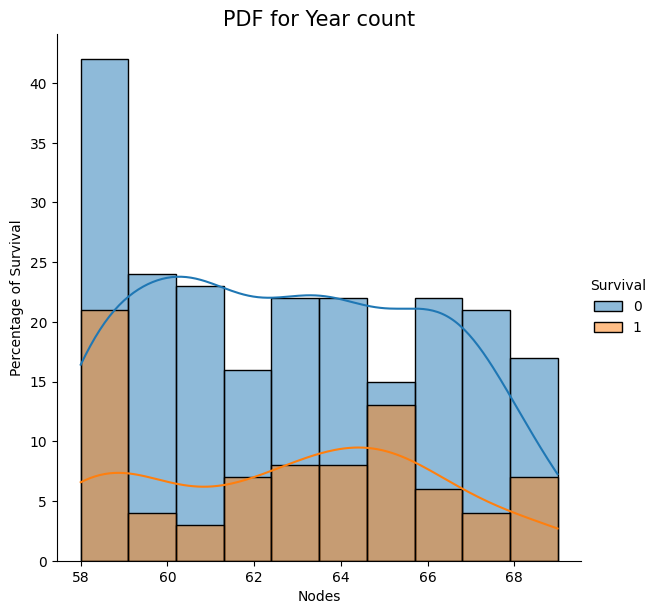

In [32]:
sns.FacetGrid(df,hue='Survival',height=6).map(sns.histplot,'Year',bins=10,kde=True).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Year count',size=15)
plt.show()

In [33]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


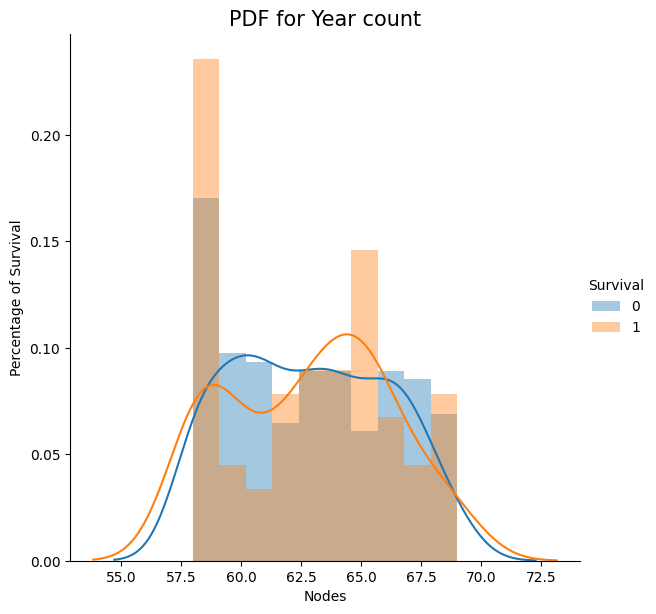

In [34]:
sns.FacetGrid(df,hue='Survival',height=6).map(sns.distplot,'Year',bins=10,kde=True).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Year count',size=15)
plt.show()

1965-46%
1958-33%
1959-45%


33% people died before 5 years when operated between 1965-66

<Figure size 1200x600 with 0 Axes>

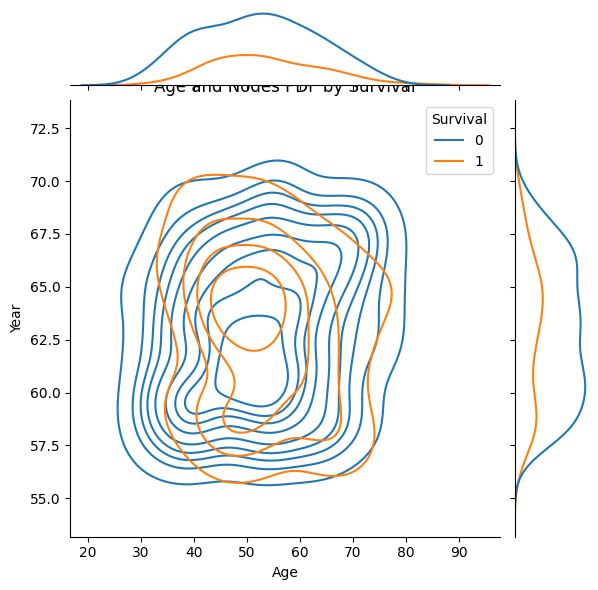

In [35]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Year',data=df,hue='Survival',kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show()

# **MULTIVARIATE** **ANALYSIS**

<Axes: >

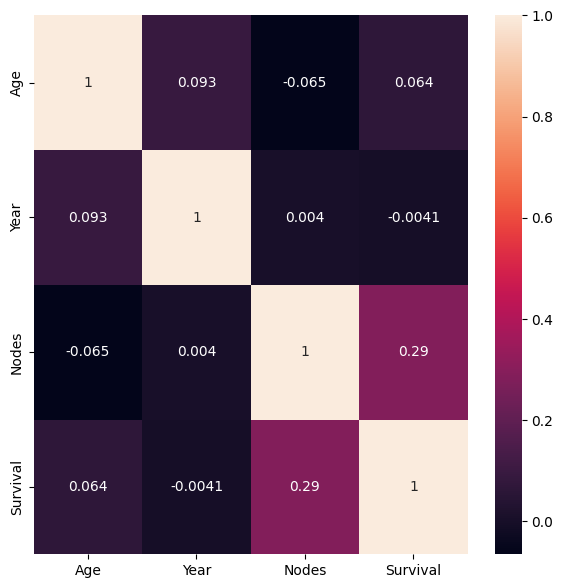

In [37]:
plt.figure(figsize=(7,7))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

Nodes and Survival are corelated by 29%